In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.manifold import TSNE

In [2]:
# Set the path of the dataset
path = '../data/AllWeldSeams'

In [3]:
# Read in the images in order of the number in their filenames, transform them to greyscale (to reduce the dimension from 3D to 2D) and append them to a list

# Define a custom sorting key function
def sort_key(filename):
    # Extract the number from the file name
    filename = filename[21:]
    number_as_string = filename.split('-')[0]
    number = int(number_as_string)
    return number

# Get the list of file names matching the pattern
file_names = glob.glob(path + '/*.jpg')

# Sort the file names based on the custom key function
sorted_file_names = sorted(file_names, key=sort_key)

# Iterate over the sorted file names and read the images
image_list = []
for filename in sorted_file_names:
    img = Image.open(filename).convert('L')
    image_list.append(img)
    print(filename)

../data/AllWeldSeams\1-hx_df_003.JPG
../data/AllWeldSeams\2-hx_df_004.JPG
../data/AllWeldSeams\3-hx_df_005.JPG
../data/AllWeldSeams\4-hx_df_006.JPG
../data/AllWeldSeams\5-hx_df_007.JPG
../data/AllWeldSeams\6-hx_df_008.JPG
../data/AllWeldSeams\7-hx_df_009.JPG
../data/AllWeldSeams\8-hx_df_010.JPG
../data/AllWeldSeams\9-hx_df_011.JPG
../data/AllWeldSeams\10-hx_df_012.JPG
../data/AllWeldSeams\11-hx_df_013.JPG
../data/AllWeldSeams\12-hx_df_014.JPG
../data/AllWeldSeams\13-hx_df_015.JPG
../data/AllWeldSeams\14-hx_df_016.JPG
../data/AllWeldSeams\15-hx_df_017.JPG
../data/AllWeldSeams\16-hx_df_018.JPG
../data/AllWeldSeams\17-hx_df_019.JPG
../data/AllWeldSeams\18-hx_df_020.JPG
../data/AllWeldSeams\19-hx_df_062.JPG
../data/AllWeldSeams\20-hx_df_063.JPG
../data/AllWeldSeams\21-hx_df_064.JPG
../data/AllWeldSeams\22-hx_df_065.JPG
../data/AllWeldSeams\23-hx_df_066.JPG
../data/AllWeldSeams\24-hx_df_067.JPG
../data/AllWeldSeams\25-hx_df_068.JPG
../data/AllWeldSeams\26-hx_df_069.JPG
../data/AllWeldSeams\

In [4]:
# To check if the images have been read in the correct order
i = 0
for img in image_list:
    i = i + 1
    print("Nr:",i,"  ","Size:",img.size)

Nr: 1    Size: (3573, 584)
Nr: 2    Size: (2192, 392)
Nr: 3    Size: (3429, 610)
Nr: 4    Size: (3353, 667)
Nr: 5    Size: (3231, 632)
Nr: 6    Size: (3470, 620)
Nr: 7    Size: (3343, 598)
Nr: 8    Size: (3463, 475)
Nr: 9    Size: (3312, 633)
Nr: 10    Size: (3417, 614)
Nr: 11    Size: (3336, 577)
Nr: 12    Size: (3248, 567)
Nr: 13    Size: (3343, 657)
Nr: 14    Size: (3364, 605)
Nr: 15    Size: (3493, 580)
Nr: 16    Size: (3418, 674)
Nr: 17    Size: (3456, 547)
Nr: 18    Size: (3528, 535)
Nr: 19    Size: (3543, 654)
Nr: 20    Size: (3600, 600)
Nr: 21    Size: (3555, 618)
Nr: 22    Size: (3656, 604)
Nr: 23    Size: (3692, 626)
Nr: 24    Size: (3648, 682)
Nr: 25    Size: (3569, 579)
Nr: 26    Size: (3656, 614)
Nr: 27    Size: (3588, 664)
Nr: 28    Size: (3642, 690)
Nr: 29    Size: (3667, 696)
Nr: 30    Size: (3580, 618)
Nr: 31    Size: (3729, 671)
Nr: 32    Size: (3603, 750)
Nr: 33    Size: (3666, 683)
Nr: 34    Size: (3659, 704)
Nr: 35    Size: (2286, 460)
Nr: 36    Size: (2211, 526)
N

In [5]:
# Convert the images in the list to an numpy array which contains the flattened and padded pixel values of the images
flattened_data_list = []
max_length_list = []

for entry in image_list:
    entry = np.asarray(entry)
    entry = entry.flatten()
    entry = entry.reshape(1, -1)
    flattened_data_list.append(entry)
    max_length_list.append(entry.shape[1])

max_length = max(max_length_list)
print(max_length)

stacked_padded_data_array = np.zeros((0, max_length))

for array in flattened_data_list:
    entry_padded = np.pad(array, ((0, 0), (0, max_length - array.shape[1])), mode='constant')
    stacked_padded_data_array = np.vstack((stacked_padded_data_array, entry_padded))

print(stacked_padded_data_array.shape)

2702250
(114, 2702250)


In [6]:
# Creating an embedding which reduces the dimensionality of the data using t-SNE for every image in the array
embedding = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, early_exaggeration=12).fit_transform(stacked_padded_data_array)

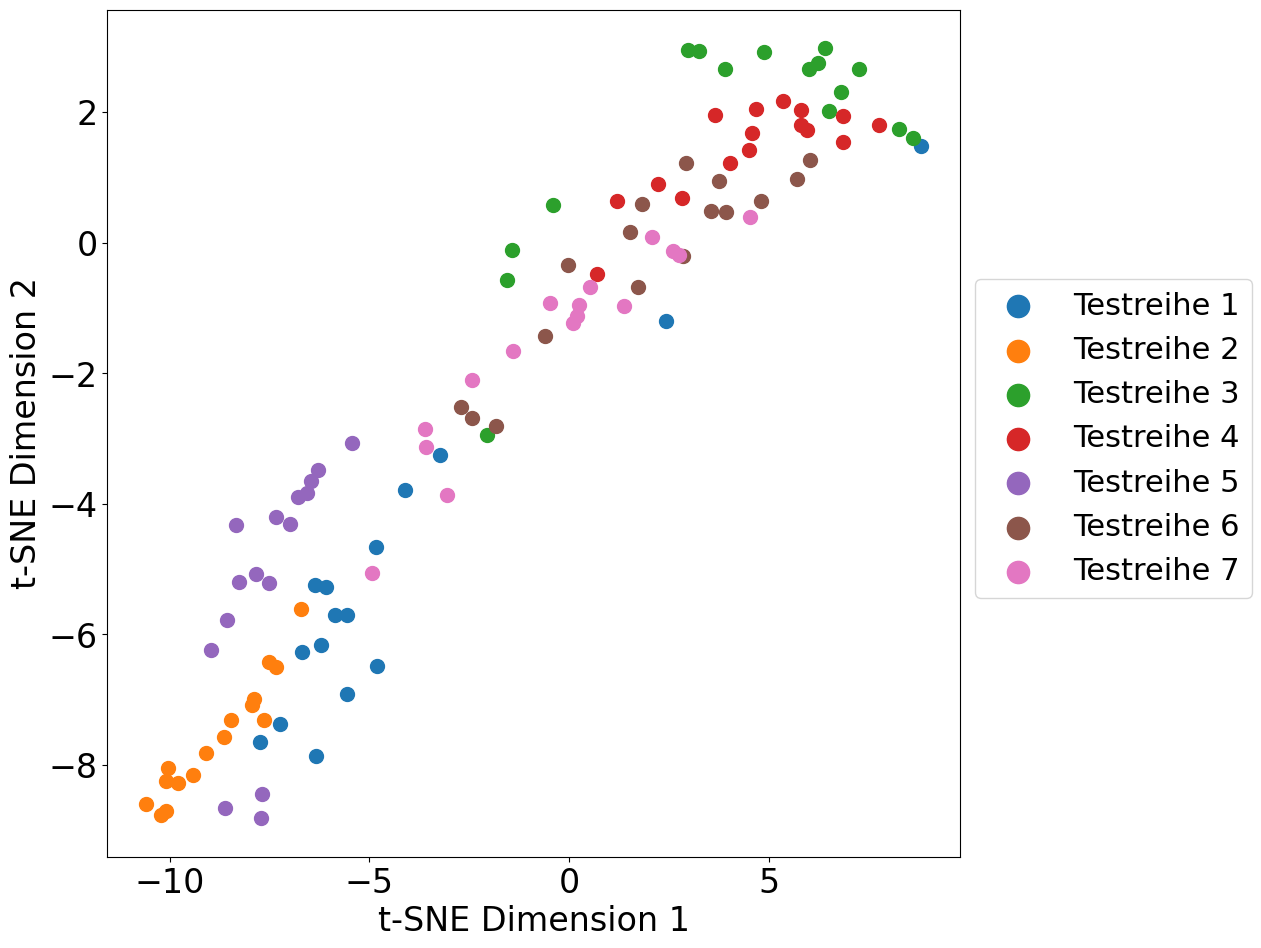

In [26]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(11, 11))

# Plotting the embedding in a scatter plot sorted by the classes of weld seams (see excel file "parameter" in the repo)
plt.scatter(embedding[:16,0], embedding[:16,1], s=100, label='Testreihe 1')       # Class 1: blue
plt.scatter(embedding[18:34,0], embedding[18:34,1], s=100, label='Testreihe 2')    # Class 2: orange
plt.scatter(embedding[34:50,0], embedding[34:50,1], s=100, label='Testreihe 3')    # Class 3: green
plt.scatter(embedding[50:66,0], embedding[50:66,1], s=100, label='Testreihe 4')    # Class 4: red
plt.scatter(embedding[66:82,0], embedding[66:82,1], s=100, label='Testreihe 5')    # Class 5: purple
plt.scatter(embedding[82:98,0], embedding[82:98,1], s=100, label='Testreihe 6')    # Class 6: brown
plt.scatter(embedding[98:114,0], embedding[98:114,1], s=100, label='Testreihe 7')  # Class 7: pink

# Change the size of the ticks on both axes
plt.tick_params(axis='both', which='major', labelsize=24)
# Add a x- and y-axis label to the plot
plt.xlabel('t-SNE Dimension 1', fontsize = 24)
plt.ylabel('t-SNE Dimension 2', fontsize = 24)
# Add a legend right next to the plot
plt.legend(fontsize=22, loc='upper left', bbox_to_anchor=(1, 0.7), markerscale=1.6)
# Add a title to the plot
#plt.title("t-SNE Embedding der gesamten Schweißnahtbilder der 7 Testreihen", fontsize = 30)
# Save the plot as a png file
plt.savefig('t-SNE_weldseamlevel_parametergroups.png', dpi=600)
plt.show()

In [8]:
# Plotting the embedding in a scatter plot sorted by the ratio of Drehzahl and Vorschub (see excel file "parameter" in the repo)
# saving the ratio groups in lists
excel_numbers_ratio_100 = [7,22,35,54,67,83,99]
excel_numbers_ratio_129 = [6,21,37,53,69,84,100]
excel_numbers_ratio_144 = [10,26,36,55,68,85,101]
excel_numbers_ratio_180 = [5,20,38,52,70,86,102]
excel_numbers_ratio_186 = [9,25,39,56,71,87,103]
excel_numbers_ratio_189 = [13,30,40,59,72,88,104]
excel_numbers_ratio_233 = [4,34,41,60,73,89,105]
excel_numbers_ratio_243 = [3,29,42,58,74,90,106]
excel_numbers_ratio_260 = [2,24,43,57,75,91,107]
excel_numbers_ratio_300 = [1,16,19,33,44,47,51,61,76,79,92,93,108,109]
excel_numbers_ratio_340 = [12,28,46,63,78,94,110]
excel_numbers_ratio_420 = [15,32,48,62,80,95,111]
excel_numbers_ratio_433 = [8,23,45,64,77,96,112]
excel_numbers_ratio_567 = [11,27,49,65,81,97,113]
excel_numbers_ratio_700 = [14,31,50,66,82,98,114]

# substracting 1 from the excel numbers to get the correct index for the embedding array
index_ratio_100 = [i-1 for i in excel_numbers_ratio_100]
index_ratio_129 = [i-1 for i in excel_numbers_ratio_129]
index_ratio_144 = [i-1 for i in excel_numbers_ratio_144]
index_ratio_180 = [i-1 for i in excel_numbers_ratio_180]
index_ratio_186 = [i-1 for i in excel_numbers_ratio_186]
index_ratio_189 = [i-1 for i in excel_numbers_ratio_189]
index_ratio_233 = [i-1 for i in excel_numbers_ratio_233]
index_ratio_243 = [i-1 for i in excel_numbers_ratio_243]
index_ratio_260 = [i-1 for i in excel_numbers_ratio_260]
index_ratio_300 = [i-1 for i in excel_numbers_ratio_300]
index_ratio_340 = [i-1 for i in excel_numbers_ratio_340]
index_ratio_420 = [i-1 for i in excel_numbers_ratio_420]
index_ratio_433 = [i-1 for i in excel_numbers_ratio_433]
index_ratio_567 = [i-1 for i in excel_numbers_ratio_567]
index_ratio_700 = [i-1 for i in excel_numbers_ratio_700]

# create a list containing all the list of indices
index_list = [index_ratio_100, index_ratio_129, index_ratio_144, index_ratio_180, index_ratio_186, index_ratio_189, index_ratio_233, index_ratio_243, index_ratio_260, index_ratio_300, index_ratio_340, index_ratio_420, index_ratio_433, index_ratio_567, index_ratio_700]

# create a list of visually distinct colors for each ratio
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94']

# select the corresponding rows in the embedding array and plot them for every ratio group
i = 0
for index_ratio in index_list:
    i = i + 1
    embeddings_ratio = embedding[index_ratio, :]
    x = embeddings_ratio[:,0]
    y = embeddings_ratio[:,1]
    
    if index_ratio == index_ratio_100:
        label = 'n/v = 1'
    elif index_ratio == index_ratio_129:
        label = 'n/v = 1.29'
    elif index_ratio == index_ratio_144:
        label = 'n/v = 1.44'
    elif index_ratio == index_ratio_180:
        label = 'n/v = 1.8'
    elif index_ratio == index_ratio_186:
        label = 'n/v = 1.86'
    elif index_ratio == index_ratio_189:
        label = 'n/v = 1.89'
    elif index_ratio == index_ratio_233:
        label = 'n/v = 2.33'
    elif index_ratio == index_ratio_243:
        label = 'n/v = 2.43'
    elif index_ratio == index_ratio_260:
        label = 'n/v = 2.6'
    elif index_ratio == index_ratio_300:
        label = 'n/v = 3'
    elif index_ratio == index_ratio_340:
        label = 'n/v = 3.4'
    elif index_ratio == index_ratio_420:   
        label = 'n/v = 4.2'
    elif index_ratio == index_ratio_433:
        label = 'n/v = 4.33'
    elif index_ratio == index_ratio_567:
        label = 'n/v = 5.67'
    elif index_ratio == index_ratio_700:
        label = 'n/v = 7'
    
    plt.scatter(x, y, s=5, label = label, color = colors[i-1])

plt.legend(fontsize = 7)
plt.title("t-sne embedding of the 114 weld seams on weld seam level")
plt.savefig('t-SNE_weldseamlevel_ratiogroups.png', dpi=600)
plt.show()